In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [121]:
OrchardInfo = pd.read_csv("VeganBerry_Orchard_RawData.csv")

In [123]:
OrchardInfo.head()

,Week,Fertilizer added (cubic feet),Fertilizer Measured,Mulch added \n(inches),Mulch Measured,Rain,Watering\n(gallons),Nutrition Lvl,Moisture,Temp,Weekly_Yield,Orchard,Location,Total Trees,Total Watered,Trees Planted
0,1,NaN,0.0,6.0,6.00,0.86,10.0,75,75,49,43,Outgrowth Orchards,Sacramento,30,10,30
1,2,NaN,0.0,NaN,5.85,0.87,NaN,79,78,50,45,Outgrowth Orchards,Sacramento,30,10,0
2,3,NaN,0.0,NaN,5.70,0.88,10.0,82,77,52,41,Outgrowth Orchards,Sacramento,60,20,30
3,4,NaN,0.0,NaN,5.55,0.87,NaN,86,79,53,51,Outgrowth Orchards,Sacramento,110,20,50
4,5,NaN,0.0,NaN,5.40,0.86,10.0,89,79,54,57,Outgrowth Orchards,Sacramento,140,30,30


In [125]:
Orchard = OrchardInfo[["Week","Fertilizer Measured","Mulch Measured","Rain","Nutrition Lvl","Moisture","Temp","Weekly_Yield","Orchard","Location","Total Trees","Total Watered","Trees Planted"]]
Orchard= Orchard.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
Orchard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 468 non-null    int64  
 1   Fertilizer Measured  468 non-null    float64
 2   Mulch Measured       468 non-null    float64
 3   Rain                 468 non-null    float64
 4   Nutrition Lvl        468 non-null    int64  
 5   Moisture             468 non-null    int64  
 6   Temp                 468 non-null    int64  
 7   Weekly_Yield         468 non-null    int64  
 8   Orchard              468 non-null    object 
 9   Location             468 non-null    object 
 10  Total Trees          468 non-null    int64  
 11  Total Watered        468 non-null    int64  
 12  Trees Planted        468 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 47.7+ KB


In [127]:
groups = Orchard.groupby('Orchard') 
category_dfs = {}
for category, group in groups:
    category_dfs[category] = group
    
Outgrowth_Orchards = category_dfs['Outgrowth Orchards']	
Organic_Gardens = category_dfs['Organic Gardens']
Frugal_Farms= category_dfs['Frugal Farms']
PowerHouse_Plantation= category_dfs['PowerHouse Plantation']
Gargantian_Grove= category_dfs['Gargantian Grove']
Berry_Bonds= category_dfs['Berry Bonds']
Friendly_Farmstead= category_dfs['Friendly Farmstead']
Nancy_Nursery= category_dfs['Nancy Nursery']
Easygoing_Estates= category_dfs['Easygoing Estates']

Text(0.5, 0.98, 'Orchard Dataset Pairplot')

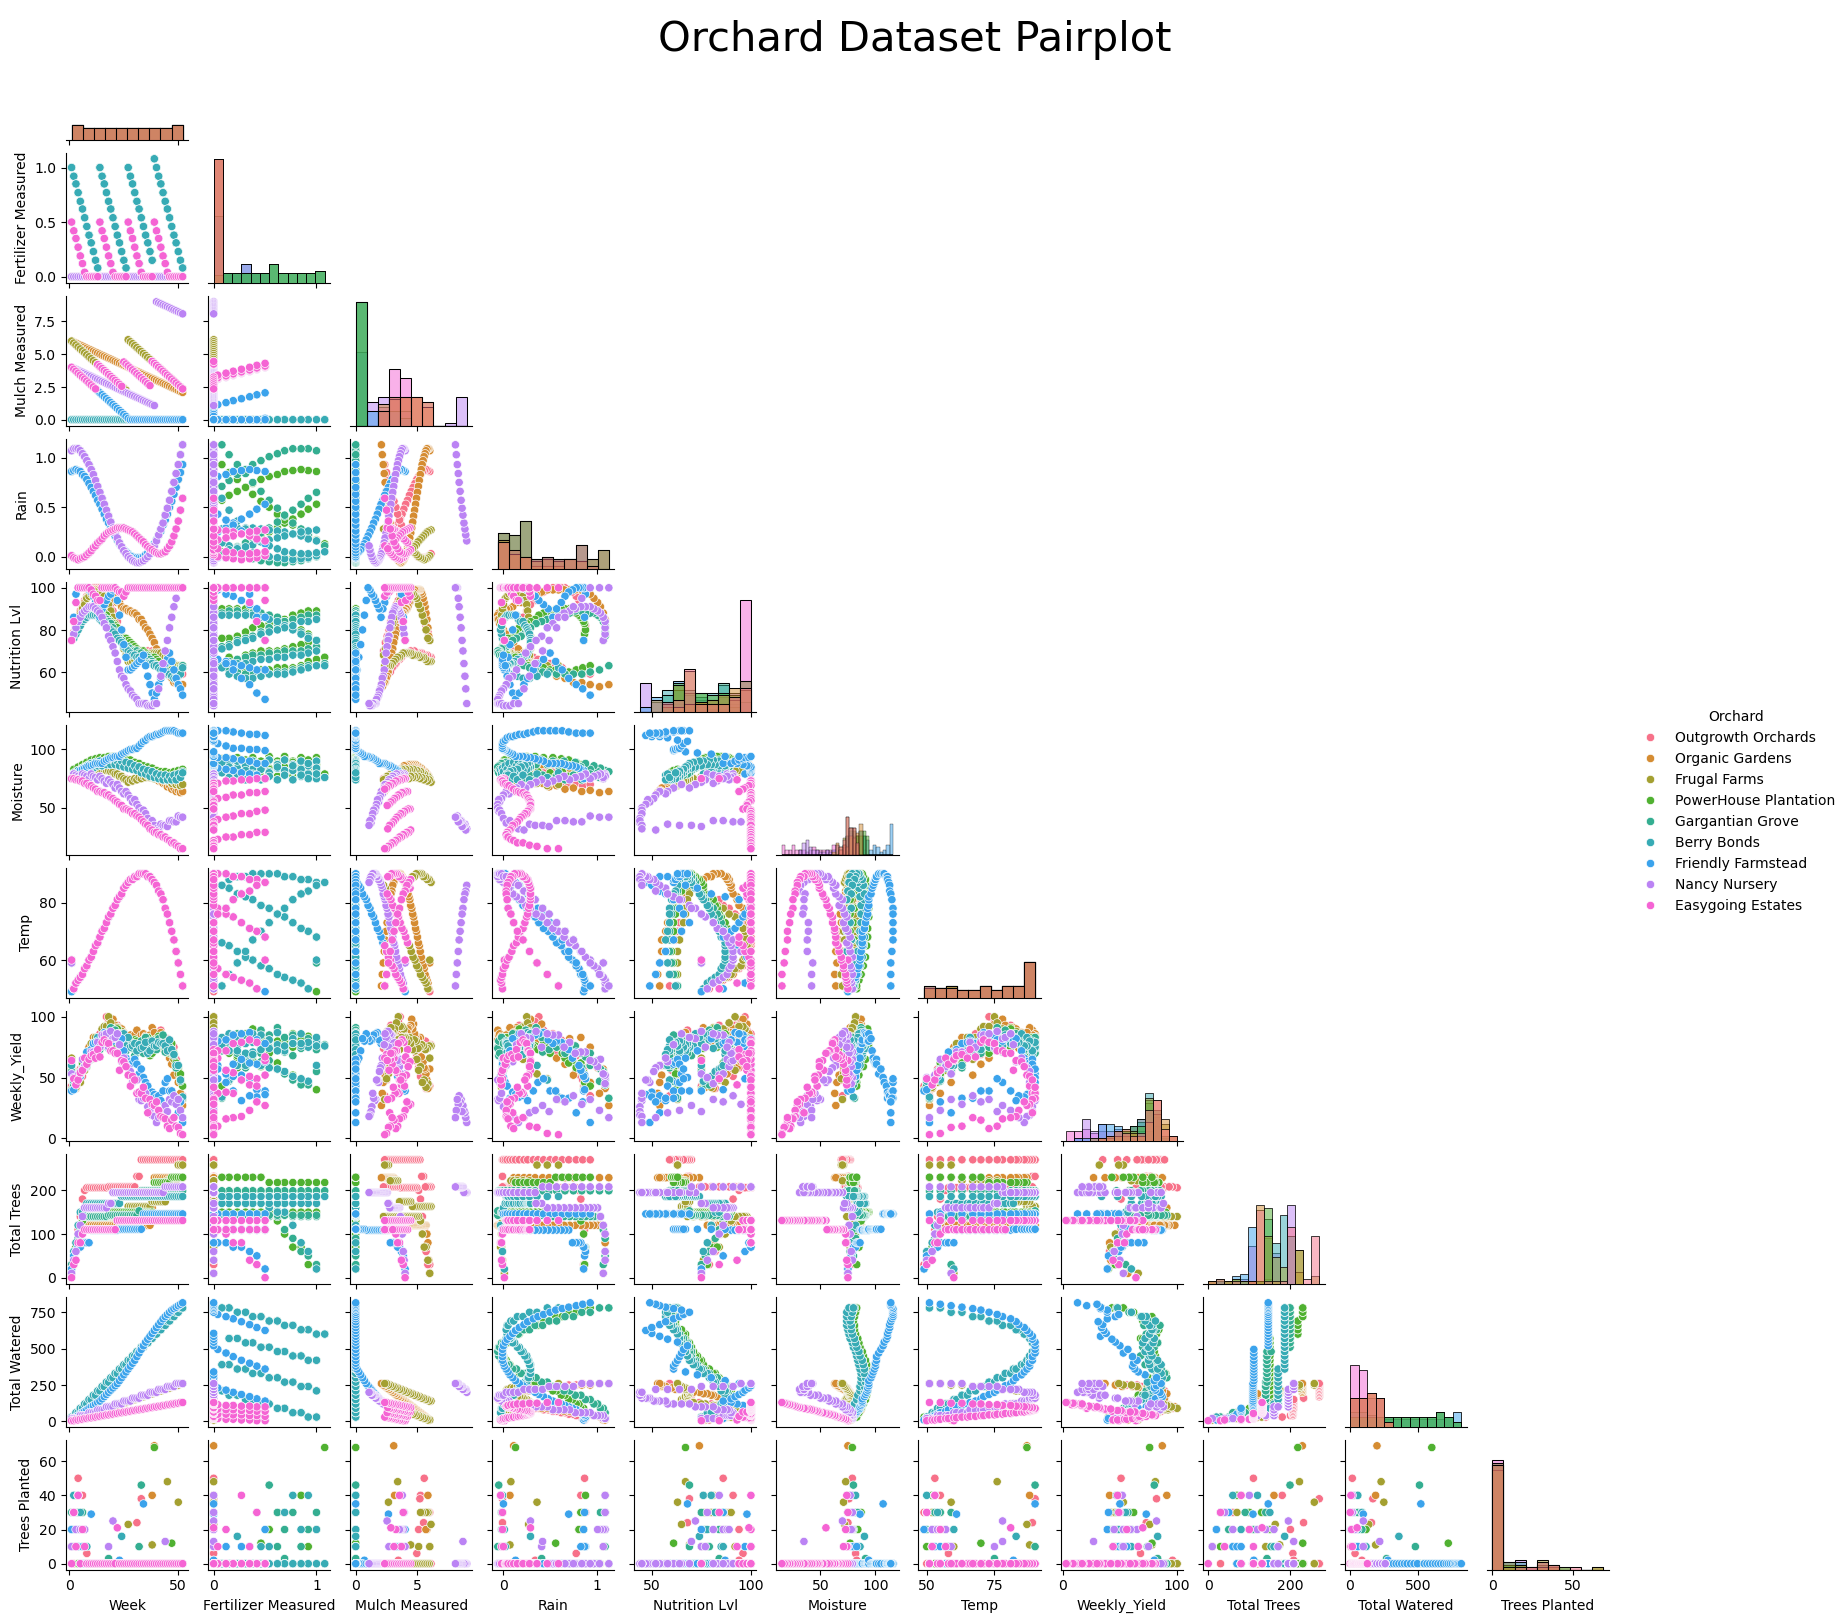

In [129]:
OrchardPlot = sns.pairplot(Orchard, corner=True, palette = 'husl', hue = "Orchard", height = 1.5, diag_kind="hist")
# for title
OrchardPlot.fig.suptitle('Orchard Dataset Pairplot',fontsize = 30)
# for legend text

In [165]:
Mulch_Measured= Orchard['Mulch Measured']
Weekly_Yield = Orchard['Weekly_Yield']
Nutrition_Lvl = Orchard['Nutrition Lvl']
Fertilizer_Measured= Orchard['Fertilizer Measured']
Rain= Orchard["Rain"]
Total_Watered = Orchard["Total Watered"]
Rain_Watered=Orchard["Rain"]+Orchard["Total Watered"]
Moisture= Orchard["Moisture"]
Temp= Orchard["Temp"]
Week = Orchard["Week"]
hue = Orchard["Orchard"]
Total_Trees= Orchard["Total Trees"]
Trees_Planted= Orchard["Trees Planted"]
categories = hue.unique()

Text(0, 0.5, 'Weekly_Yield(lbs of berries)')

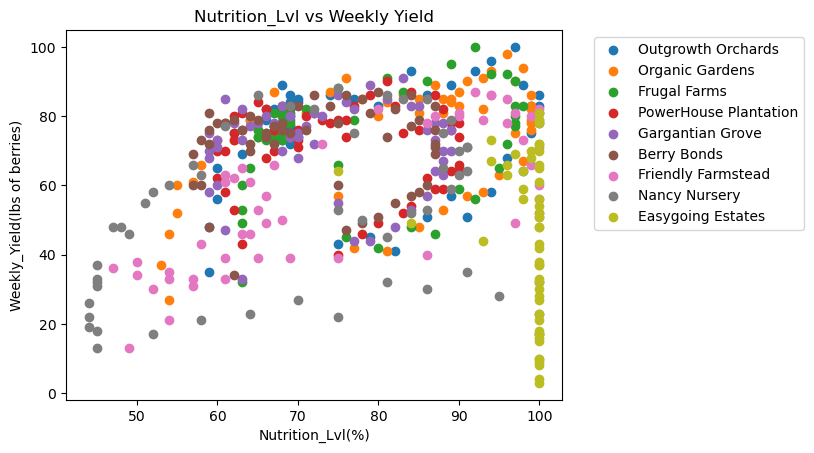

In [167]:
for category in categories:
    plt.scatter(Nutrition_Lvl[hue == category],Weekly_Yield[hue == category],label=category)
plt.title('Nutrition_Lvl vs Weekly Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.xlabel('Nutrition_Lvl(%)')
plt.ylabel('Weekly_Yield(lbs of berries)')


Text(0, 0.5, 'Weekly_Yield(lbs of berries)')

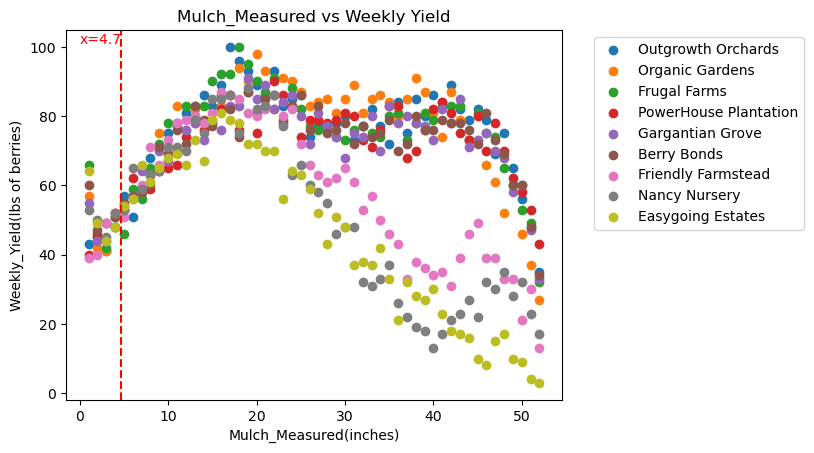

In [171]:
for category in categories:
    plt.scatter(Mulch_Measured[hue == category],Weekly_Yield[hue == category],label=category)
plt.title('Mulch_Measured vs Weekly Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
specific_x = 4.7
plt.axvline(x=specific_x, color='r', linestyle='--')
plt.text(specific_x, max(Weekly_Yield), f'x={4.7}', ha='right', va='bottom', color='r')

plt.xlabel('Mulch_Measured(inches)')
plt.ylabel('Weekly_Yield(lbs of berries)')


Text(0, 0.5, 'Weekly_Yield(lbs of berries)')

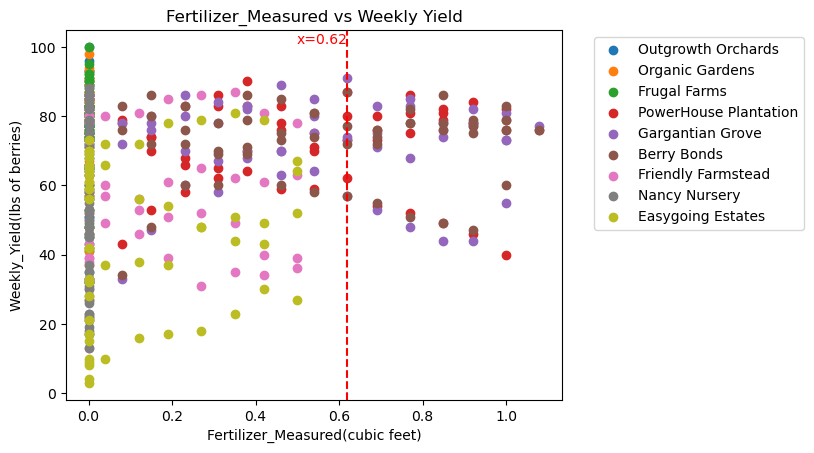

In [10]:
for category in categories:
    plt.scatter(Fertilizer_Measured[hue == category],Weekly_Yield[hue == category],label=category)
plt.title('Fertilizer_Measured vs Weekly Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
specific_x = 0.62
plt.axvline(x=specific_x, color='r', linestyle='--')
plt.text(specific_x, max(Weekly_Yield), f'x={0.62}', ha='right', va='bottom', color='r')

plt.xlabel('Fertilizer_Measured(cubic feet)')
plt.ylabel('Weekly_Yield(lbs of berries)')

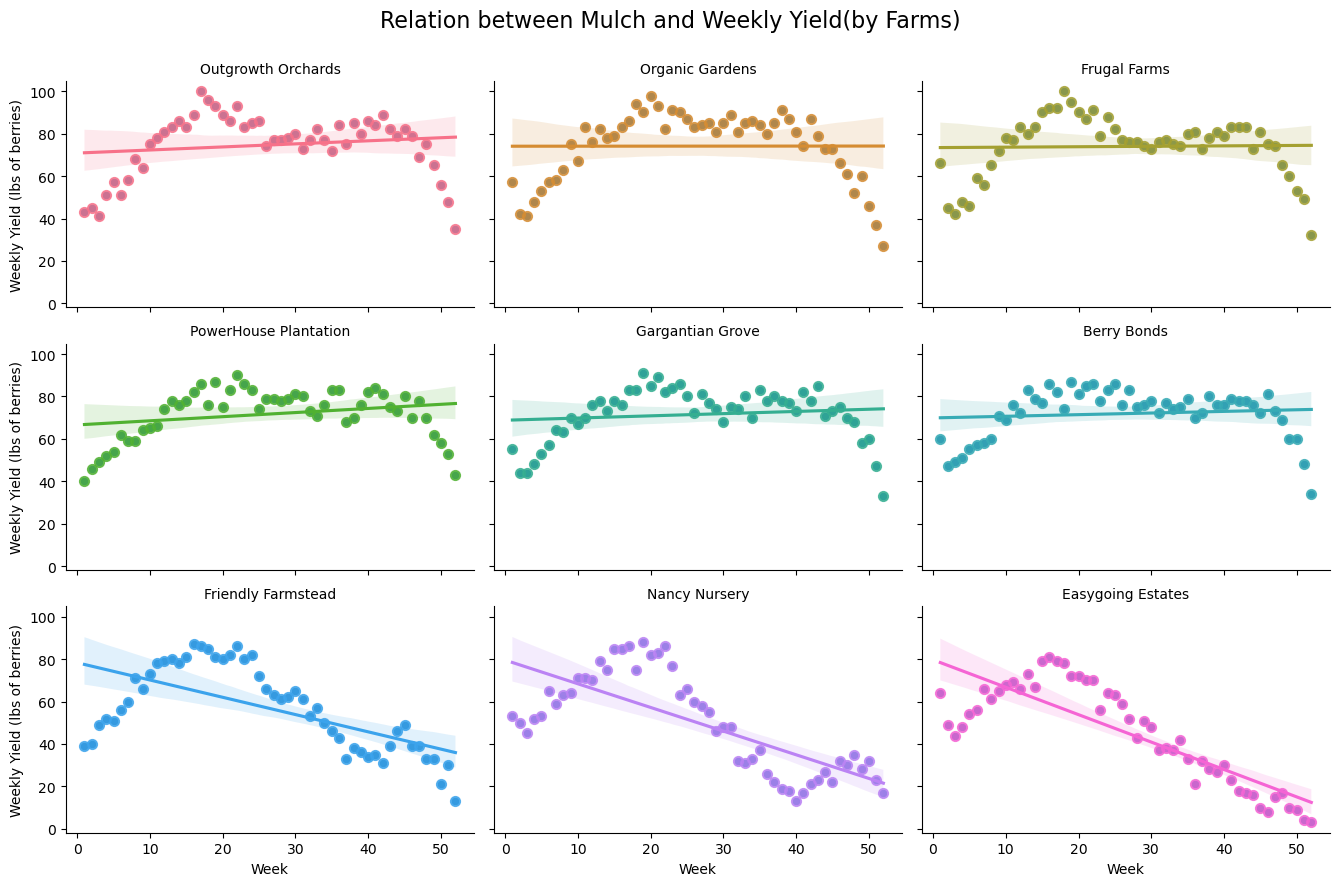

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Map the scatterplot to the grid
g.map(sns.scatterplot, "Week", "Weekly_Yield")

# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Week', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Mulch and Weekly Yield(by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Week", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()

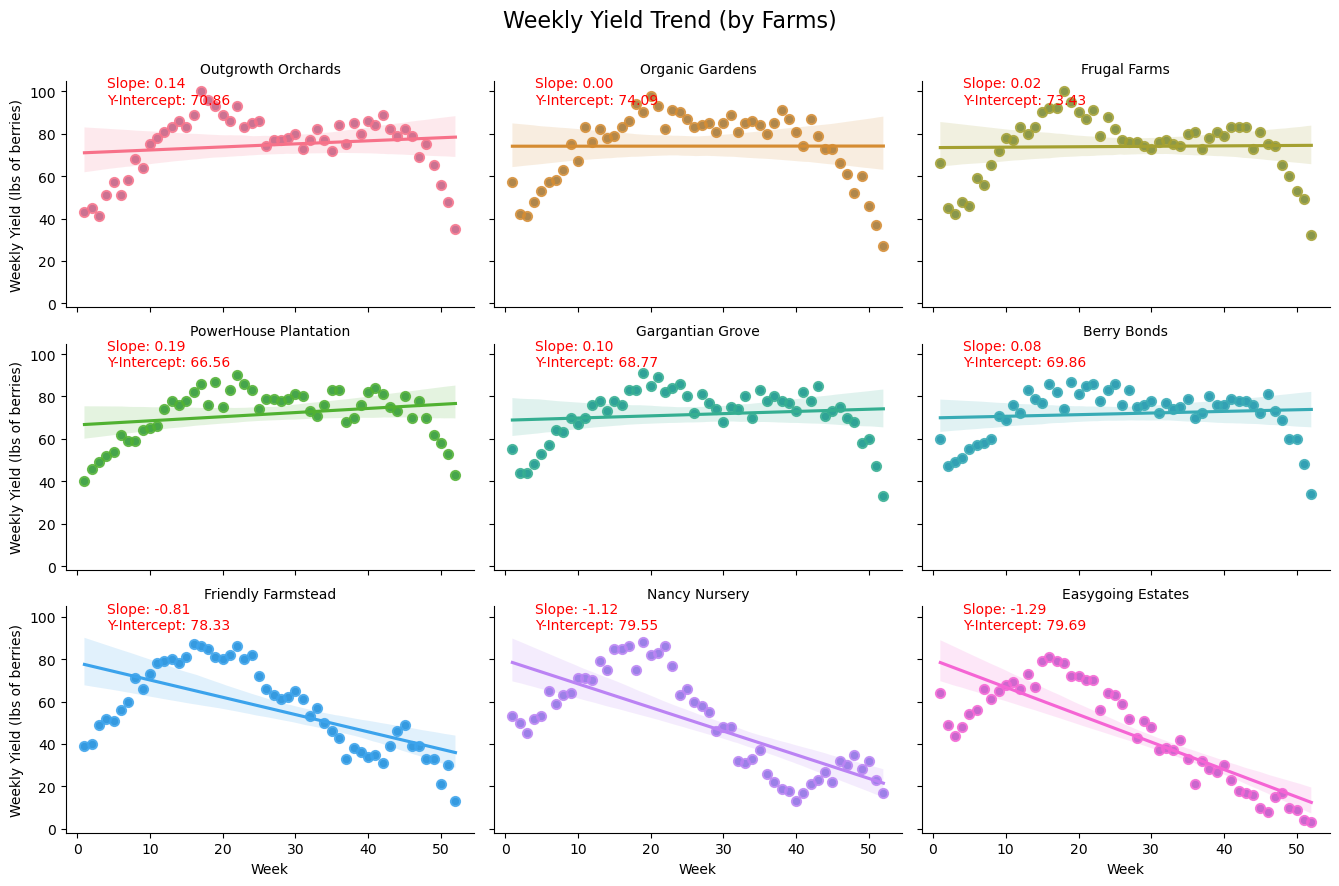

In [185]:
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept

# Map the scatterplot to the grid
g.map(sns.scatterplot, "Week", "Weekly_Yield")

# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Week', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Week'], subdata['Weekly_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Weekly Yield Trend (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Week", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



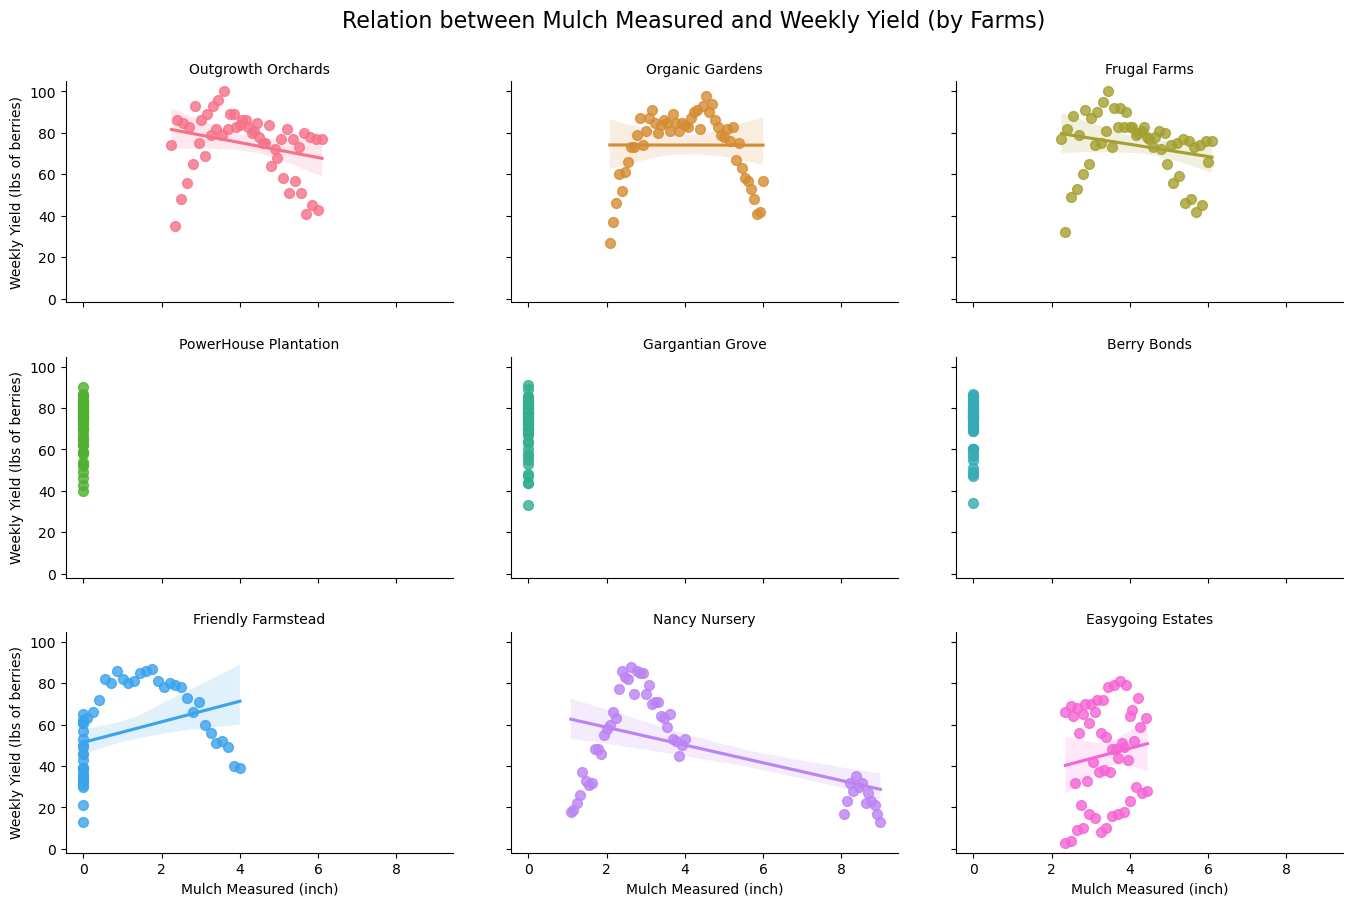

In [195]:
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Mulch Measured', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Mulch Measured and Weekly Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Mulch Measured (inch)", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



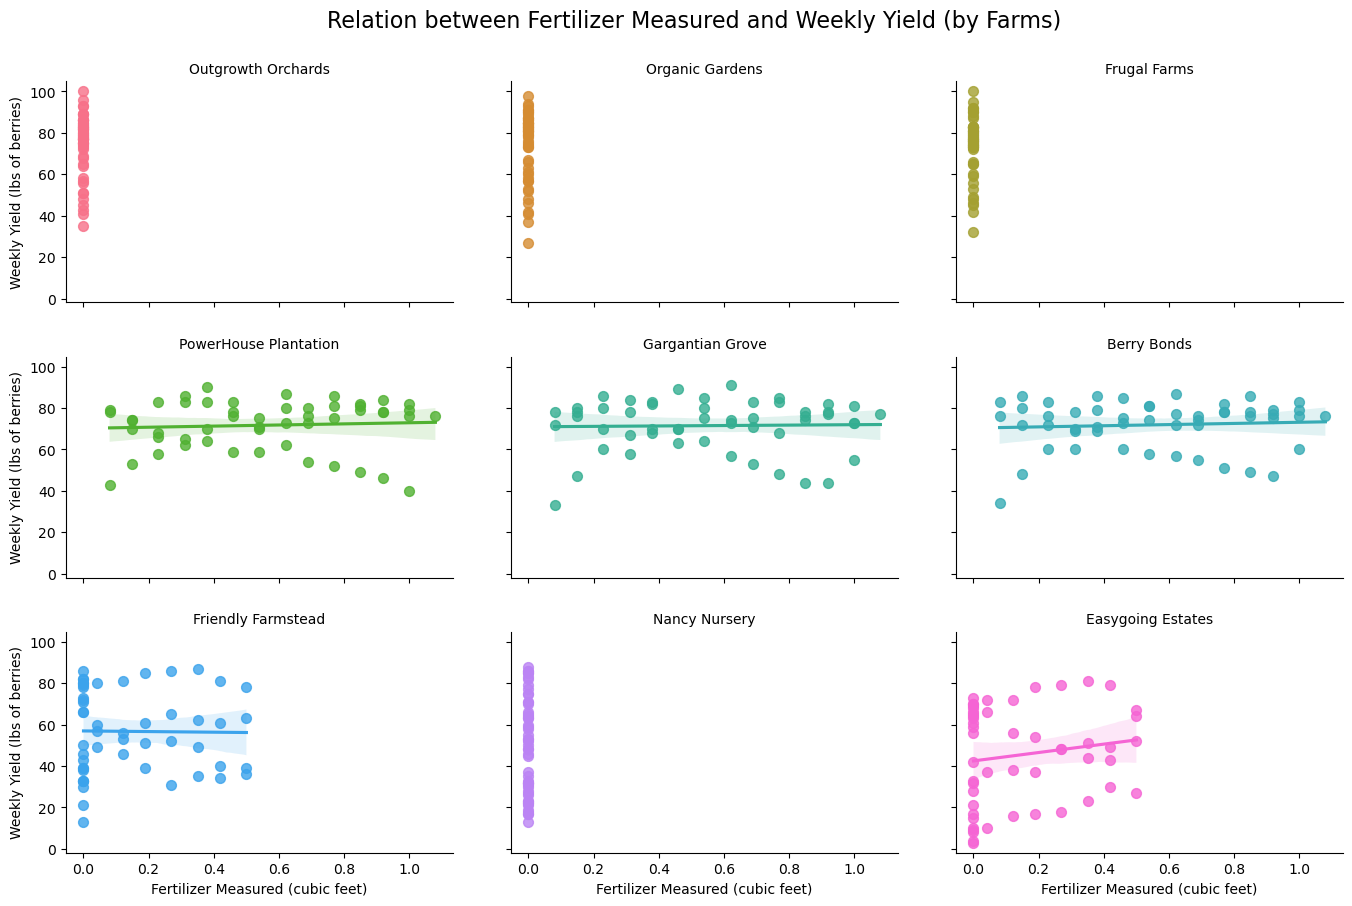

In [197]:
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Fertilizer Measured', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Fertilizer Measured and Weekly Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Fertilizer Measured (cubic feet)", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



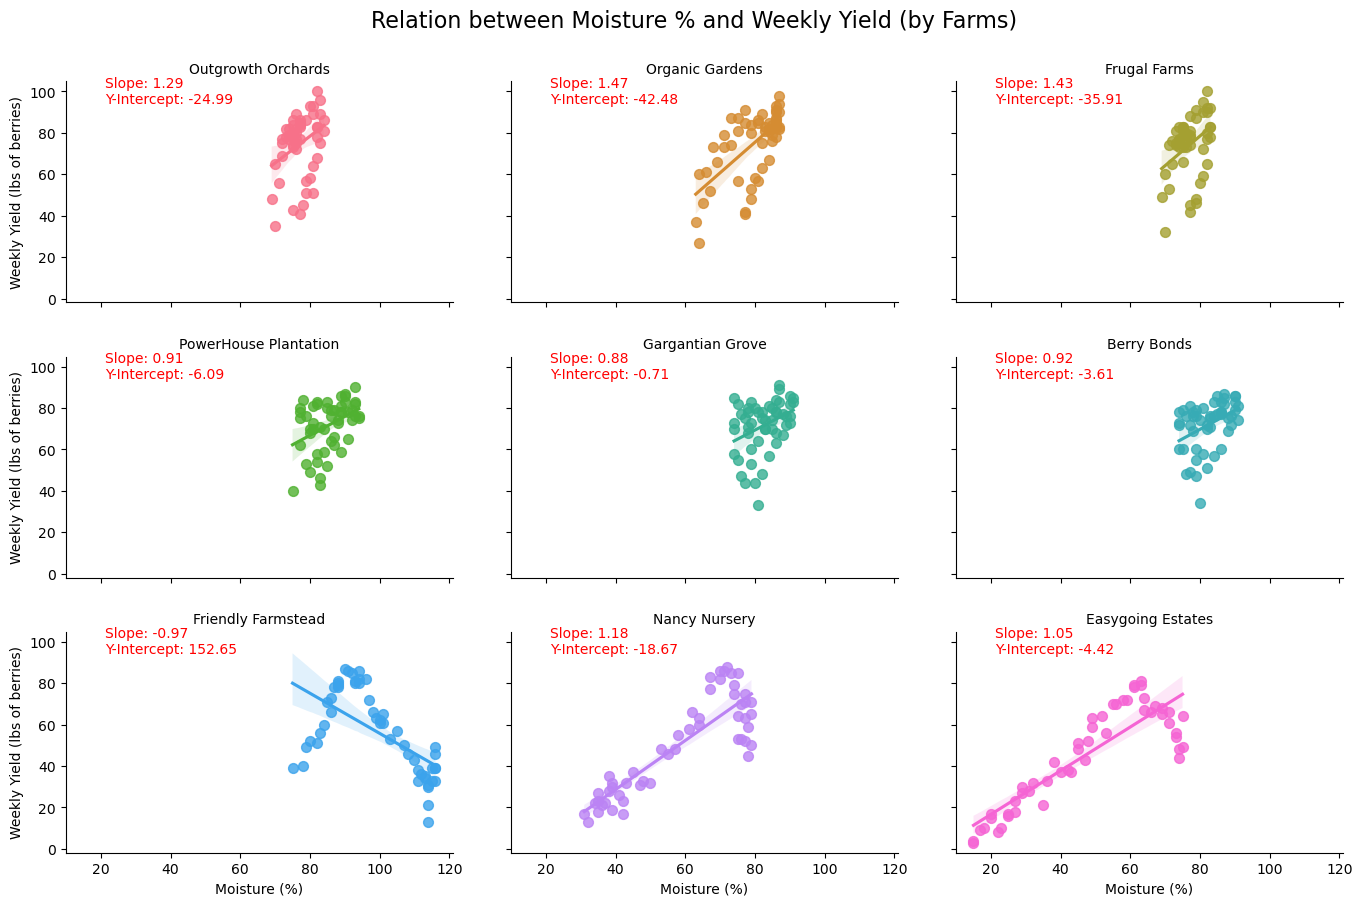

In [203]:
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Moisture', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Moisture'], subdata['Weekly_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Moisture % and Weekly Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Moisture (%)", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


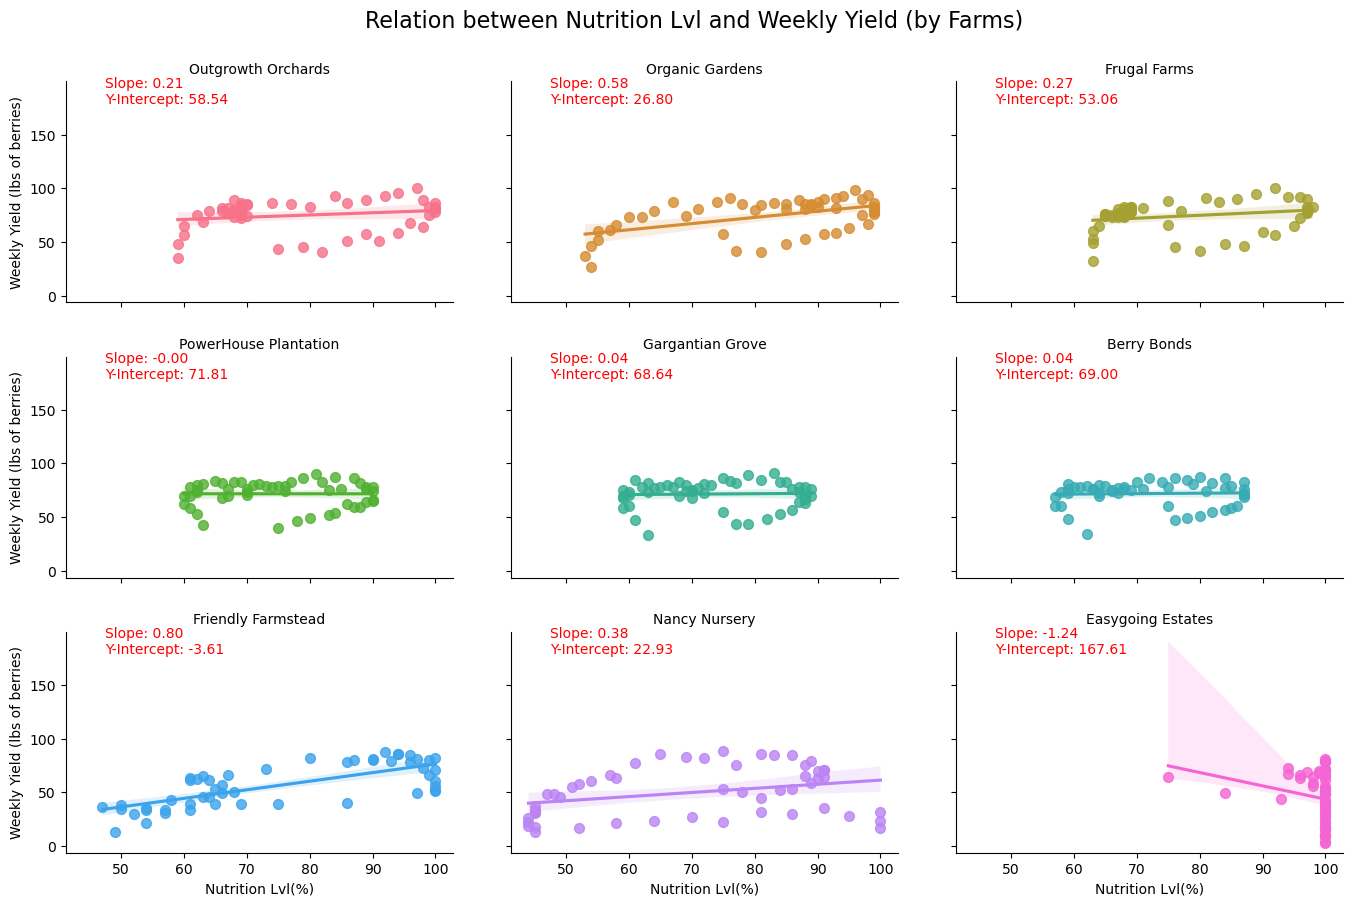

In [201]:
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Nutrition Lvl', y='Weekly_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Nutrition Lvl'], subdata['Weekly_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Nutrition Lvl and Weekly Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Nutrition Lvl(%)", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()
